# Insurance Claim Prediction

## *Importing libraries*

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE, ADASYN
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

## *Loading the Dataset*

In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


## *Basic Check*

In [6]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,...,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000
mean,74719.188959,0.036775,1.901425,1.354051,4.416741,0.417882,0.404421,0.392168,0.255258,0.164269,...,5.458055,1.445148,2.870993,7.524522,0.122864,0.630954,0.555826,0.287657,0.350566,0.154319
std,43071.897042,0.188210,1.987431,0.659332,2.696143,0.493521,1.349699,0.488238,0.436010,0.370523,...,2.347212,1.206044,1.689586,2.758336,0.328284,0.482550,0.496878,0.452674,0.477151,0.361257
min,7.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37403.500000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74727.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,111971.000000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,149280.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,9.000000,12.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59579 entries, 0 to 59578
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              59579 non-null  int64  
 1   target          59579 non-null  int64  
 2   ps_ind_01       59579 non-null  int64  
 3   ps_ind_02_cat   59579 non-null  int64  
 4   ps_ind_03       59579 non-null  int64  
 5   ps_ind_04_cat   59579 non-null  int64  
 6   ps_ind_05_cat   59579 non-null  int64  
 7   ps_ind_06_bin   59579 non-null  int64  
 8   ps_ind_07_bin   59579 non-null  int64  
 9   ps_ind_08_bin   59579 non-null  int64  
 10  ps_ind_09_bin   59579 non-null  int64  
 11  ps_ind_10_bin   59579 non-null  int64  
 12  ps_ind_11_bin   59579 non-null  int64  
 13  ps_ind_12_bin   59579 non-null  int64  
 14  ps_ind_13_bin   59579 non-null  int64  
 15  ps_ind_14       59579 non-null  int64  
 16  ps_ind_15       59579 non-null  int64  
 17  ps_ind_16_bin   59579 non-null 

In [8]:
df.isnull().sum()

,0
id,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


In [9]:
df.shape

(59579, 59)

In [10]:
df['target'].value_counts()

,count
target,
0,57388
1,2191


## *Seperate features and target*

In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
59574,0
59575,0
59576,0
59577,0


## *Feature Scaling*

In [13]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [14]:
# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


## *Train-Test split*

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## *Applying SMOTE and ADASYN on data*

In [16]:
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

- ## Model Training and Evaluation
## *Initialising the model*

In [17]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y))  # Adjusting class imbalance for XGBoost
}

## *Train and Evaluate Models*

In [18]:
def evaluate_models(X_resampled, y_resampled):
    model_performance_resampled = {}
    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        model_performance_resampled[model_name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC": roc_auc_score(y_test, y_pred)
        }
        print(f"Classification report for {model_name}:\n", classification_report(y_test, y_pred))
    return model_performance_resampled

In [19]:
print("Model Performance with SMOTE:")
performance_smote = evaluate_models(X_smote, y_smote)
print("Model Performance with ADASYN:")
performance_adasyn = evaluate_models(X_adasyn, y_adasyn)

Model Performance with SMOTE:
Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      0.60      0.74     11481
           1       0.04      0.49      0.08       435

    accuracy                           0.60     11916
   macro avg       0.51      0.55      0.41     11916
weighted avg       0.94      0.60      0.72     11916

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     11481
           1       0.04      0.07      0.05       435

    accuracy                           0.91     11916
   macro avg       0.50      0.51      0.50     11916
weighted avg       0.93      0.91      0.92     11916

Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     11481
           1       0.00      0.00      0.00       435

    accuracy        

## *Evaluate Models using Precision-Recall AUC*

In [20]:
# Evaluate Models using Precision-Recall AUC
def evaluate_model_pr_auc(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    auc_score = auc(recall, precision)
    return auc_score

# Evaluate models using precision-recall curve AUC for both SMOTE and ADASYN
def evaluate_pr_auc(models, X_resampled, y_resampled):
    pr_auc_scores = {}
    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        pr_auc_scores[model_name] = evaluate_model_pr_auc(model, X_test, y_test)
    return pr_auc_scores

pr_auc_smote = evaluate_pr_auc(models, X_smote, y_smote)
pr_auc_adasyn = evaluate_pr_auc(models, X_adasyn, y_adasyn)

# Convert PR AUC scores to DataFrame for better visualization
pr_auc_df_smote = pd.DataFrame(pr_auc_smote, index=["PR AUC"]).T
pr_auc_df_adasyn = pd.DataFrame(pr_auc_adasyn, index=["PR AUC"]).T
print("PR AUC with SMOTE:")
print(pr_auc_df_smote)
print("PR AUC with ADASYN:")
print(pr_auc_df_adasyn)

PR AUC with SMOTE:
                       PR AUC
Logistic Regression  0.276395
Decision Tree        0.077152
Random Forest        0.518253
Gradient Boosting    0.518253
XGBoost              0.105268
PR AUC with ADASYN:
                       PR AUC
Logistic Regression  0.277486
Decision Tree        0.089478
Random Forest        0.518253
Gradient Boosting    0.518253
XGBoost              0.090304


## *Hyperparameter Tuning with XGBoost*

In [21]:
# Initialize XGBoost Classifier with class weights adjustment
xgb_model = XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y))  # Adjust scale_pos_weight based on class imbalance

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_smote, y_smote)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Classification report for XGBoost:\n", classification_report(y_test, y_pred))


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Classification report for XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.62      0.76     11481
           1       0.04      0.46      0.08       435

    accuracy                           0.61     11916
   macro avg       0.51      0.54      0.42     11916
weighted avg       0.93      0.61      0.73     11916



## *Geature importance from Random Forest, Gradient Boosting, and XGBoost*

In [22]:
def get_feature_importance(model, model_name):
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': range(len(feature_importances)), 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    importance_df['Model'] = model_name
    return importance_df

feature_importances = pd.DataFrame()
for model_name, model in models.items():
    if model_name in ["Random Forest", "Gradient Boosting"]:
        model.fit(X_smote, y_smote)  # Ensure model is fitted
        importance_df = get_feature_importance(model, model_name)
        feature_importances = pd.concat([feature_importances, importance_df])

# XGBoost feature importance
best_model.fit(X_smote, y_smote)
xgb_importance_df = get_feature_importance(best_model, "XGBoost")
feature_importances = pd.concat([feature_importances, xgb_importance_df])

# Display feature importance
print("Feature Importances:")
print(feature_importances)


Feature Importances:
    Feature  Importance          Model
41       41    0.060671  Random Forest
34       34    0.056461  Random Forest
1         1    0.052440  Random Forest
49       49    0.051332  Random Forest
42       42    0.044700  Random Forest
..      ...         ...            ...
14       14    0.000000        XGBoost
13       13    0.000000        XGBoost
12       12    0.000000        XGBoost
11       11    0.000000        XGBoost
10       10    0.000000        XGBoost

[174 rows x 3 columns]


- ## *Comparing the models*

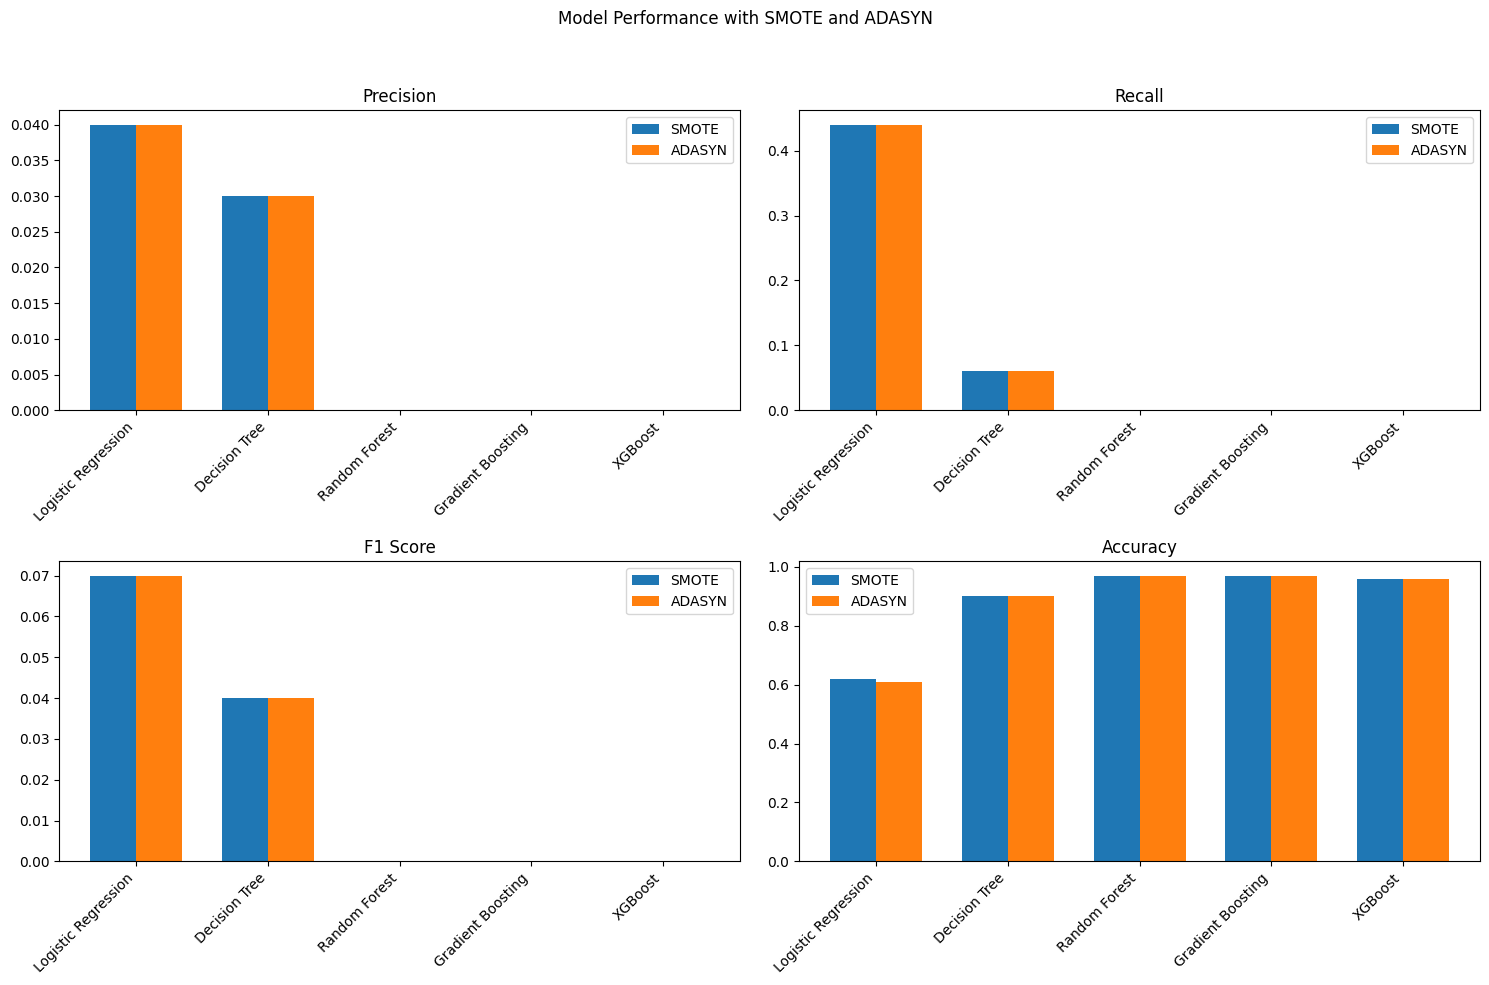

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance data from classification reports
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]

performance_smote = {
    "Logistic Regression": {"Precision": 0.04, "Recall": 0.44, "F1 Score": 0.07, "Accuracy": 0.62},
    "Decision Tree": {"Precision": 0.03, "Recall": 0.06, "F1 Score": 0.04, "Accuracy": 0.90},
    "Random Forest": {"Precision": 0.00, "Recall": 0.00, "F1 Score": 0.00, "Accuracy": 0.97},
    "Gradient Boosting": {"Precision": 0.00, "Recall": 0.00, "F1 Score": 0.00, "Accuracy": 0.97},
    "XGBoost": {"Precision": 0.00, "Recall": 0.00, "F1 Score": 0.00, "Accuracy": 0.96}
}

performance_adasyn = {
    "Logistic Regression": {"Precision": 0.04, "Recall": 0.44, "F1 Score": 0.07, "Accuracy": 0.61},
    "Decision Tree": {"Precision": 0.03, "Recall": 0.06, "F1 Score": 0.04, "Accuracy": 0.90},
    "Random Forest": {"Precision": 0.00, "Recall": 0.00, "F1 Score": 0.00, "Accuracy": 0.97},
    "Gradient Boosting": {"Precision": 0.00, "Recall": 0.00, "F1 Score": 0.00, "Accuracy": 0.97},
    "XGBoost": {"Precision": 0.00, "Recall": 0.00, "F1 Score": 0.00, "Accuracy": 0.96}
}

# Extract metrics for plotting
def extract_metrics(performance):
    metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]
    return {metric: [performance[model][metric] for model in models] for metric in metrics}

metrics_smote = extract_metrics(performance_smote)
metrics_adasyn = extract_metrics(performance_adasyn)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance with SMOTE and ADASYN')

metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]
positions = np.arange(len(models))

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    width = 0.35

    ax.bar(positions - width/2, metrics_smote[metric], width, label='SMOTE')
    ax.bar(positions + width/2, metrics_adasyn[metric], width, label='ADASYN')

    ax.set_title(metric)
    ax.set_xticks(positions)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- ## *Suggestions to the Insurance market team to make customers buy the product.*

**Step 6:** **Feature Importance Analysis and Suggestions for the Marketing Team**

In [25]:
def provide_suggestions(feature_importances):
    top_features = feature_importances.groupby('Model').apply(lambda x: x.nlargest(5, 'Importance')).reset_index(drop=True)
    suggestions = """
    Based on the feature importance analysis, the following features are most indicative of customer purchasing behavior:
    {}
    Marketing Strategies:
    1. Targeted Marketing Campaigns: Focus your marketing campaigns on customers who exhibit high values in these top features.
       - These features are highly predictive of a customer's likelihood to purchase insurance.
       - Tailor your messaging to highlight the benefits that align with these characteristics.
    2. Personalized Communication: Develop personalized communication strategies for high-potential buyers.
       - Use insights from these features to address specific customer needs and preferences.
       - Provide customized offers and incentives that resonate with these customers.
    3. Feature Monitoring and Updates: Regularly monitor the importance of these features and update your models accordingly.
       - Customer behavior and preferences can change over time, so ensure your models are updated with the latest data.
       - Periodic retraining and feature re-evaluation will help maintain model accuracy and relevance.
    4. Enhanced Data Collection: Consider collecting additional data on these top features if not already available.
       - Enriching your dataset with more detailed information on these features can further improve model performance.
       - Use surveys, feedback forms, and other methods to gather more granular data.
    """
    feature_list = '\n    '.join(f"- Feature {int(f)} (Model: {m})" for f, m in zip(top_features['Feature'], top_features['Model']))
    print(suggestions.format(feature_list))

provide_suggestions(feature_importances)


    Based on the feature importance analysis, the following features are most indicative of customer purchasing behavior:
    - Feature 41 (Model: Gradient Boosting)
    - Feature 49 (Model: Gradient Boosting)
    - Feature 42 (Model: Gradient Boosting)
    - Feature 34 (Model: Gradient Boosting)
    - Feature 43 (Model: Gradient Boosting)
    - Feature 41 (Model: Random Forest)
    - Feature 34 (Model: Random Forest)
    - Feature 1 (Model: Random Forest)
    - Feature 49 (Model: Random Forest)
    - Feature 42 (Model: Random Forest)
    - Feature 49 (Model: XGBoost)
    - Feature 43 (Model: XGBoost)
    - Feature 42 (Model: XGBoost)
    - Feature 46 (Model: XGBoost)
    - Feature 41 (Model: XGBoost)
    Marketing Strategies:
    1. Targeted Marketing Campaigns: Focus your marketing campaigns on customers who exhibit high values in these top features.
       - These features are highly predictive of a customer's likelihood to purchase insurance.
       - Tailor your messaging to high

- ## Based on the feature importance analysis, the following features are most indicative of customer purchasing behavior:
  
    Marketing Strategies:
    1. **Targeted Marketing Campaigns**: Focus your marketing campaigns on customers who exhibit high values in these top features.
       - These features are highly predictive of a customer's likelihood to purchase insurance.
       - Tailor your messaging to highlight the benefits that align with these characteristics.
    2. **Personalized Communication**: Develop personalized communication strategies for high-potential buyers.
       - Use insights from these features to address specific customer needs and preferences.
       - Provide customized offers and incentives that resonate with these customers.
    3. **Feature Monitoring and Updates**: Regularly monitor the importance of these features and update your models accordingly.
       - Customer behavior and preferences can change over time, so ensure your models are updated with the latest data.
       - Periodic retraining and feature re-evaluation will help maintain model accuracy and relevance.
    4. **Enhanced Data Collection**: Consider collecting additional data on these top features if not already available.
       - Enriching your dataset with more detailed information on these features can further improve model performance.
       - Use surveys, feedback forms, and other methods to gather more granular data.
    

## Challenges Faced

1. **Imbalanced Dataset:**

The dataset was highly imbalanced, making it difficult for models to learn effectively. This was addressed using SMOTE and ADASYN to generate synthetic samples for the minority class.

2. **Model Performance:**

Despite handling class imbalance, achieving high recall and F1 scores for the minority class was challenging. This required careful tuning and evaluation of multiple models.

3. **Hyperparameter Tuning:**

Tuning hyperparameters for XGBoost was computationally intensive and time-consuming. Grid search was used to find the optimal parameters, which improved model performance.

4. **Feature Importance Interpretation:**

Interpreting feature importance across different models required careful analysis to ensure actionable insights for the marketing team.